In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
plt.rcParams['text.usetex'] = True

In [19]:
T_sur_Tc = []
M = []
varM = []
E = []
varE = []

for k in range(49):
    data = np.loadtxt(f"scan_T_big/ising_magnétisation_énergie.{k}.txt")
    steps = data[:,0]
    N0 = np.searchsorted(steps, 1e9)
    steps = data[N0:,0]
    magnet = data[N0:,1]
    énergie = data[N0:,2]

    N_cut = 4
    L = int(len(steps) / N_cut - 1)
    for i in range(N_cut):
        serie_M = magnet[L*i:L*(i+1)]
        serie_E = énergie[L*i:L*(i+1)]

        T = 1.2 - 0.4*k/50.
        T_sur_Tc += [ T ]
        M += [ np.mean(serie_M) ]
        varM += [ np.std(serie_M) ]
        E += [ np.mean(serie_E) ]
        varE += [ np.std(serie_E) ]

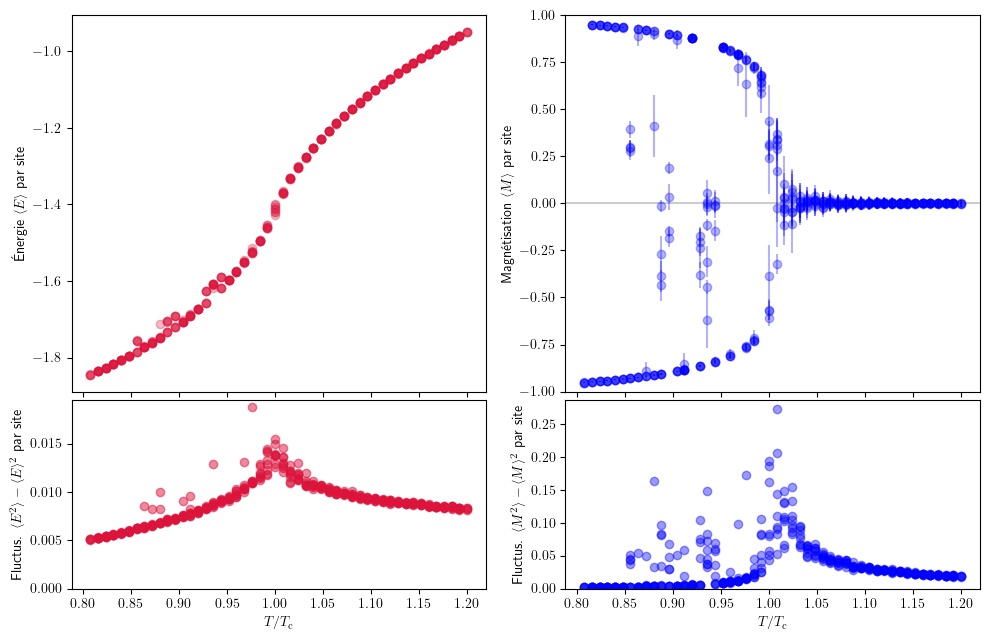

In [20]:
fig, ((ax11, ax21), (ax12, ax22)) = plt.subplots(2,2, height_ratios=[2,1], figsize=(10,6.5), sharex=True)

ax11.scatter(T_sur_Tc, E, marker='o', alpha=0.3, color='crimson')
ax11.set_ylabel(r"Énergie $\langle E \rangle$ par site")
ax12.scatter(T_sur_Tc, varE, marker='o', alpha=0.5, color='crimson')
ax12.set_ylabel(r"Fluctus. $\langle E^2 \rangle - \langle E \rangle^2$ par site")
ax12.set_ylim(0,None)

ax21.errorbar(T_sur_Tc, M, yerr=varM, linestyle='', marker='o', alpha=0.3, color='blue')
# ax21.errorbar(T_sur_Tc, -np.array(M), yerr=varM, linestyle='', marker='o', alpha=0.2, color='blue')
ax21.axhline(y=0, color='black', alpha=0.2)
ax21.set_ylim(-1,1)
ax21.set_ylabel(r"Magnétisation $\langle M \rangle$ par site")
ax22.scatter(T_sur_Tc, varM, marker='o', alpha=0.4,  color='blue')
ax22.set_ylim(0,None)
ax22.set_ylabel(r"Fluctus. $\langle M^2 \rangle - \langle M \rangle^2$ par site")

ax12.set_xlabel(r"$T/T_\mathrm{c}$")
ax22.set_xlabel(r"$T/T_\mathrm{c}$")

plt.tight_layout()
fig.subplots_adjust(hspace=0.03)

# plt.savefig("ising_stats_scanT_250x250_5e9steps.pdf")

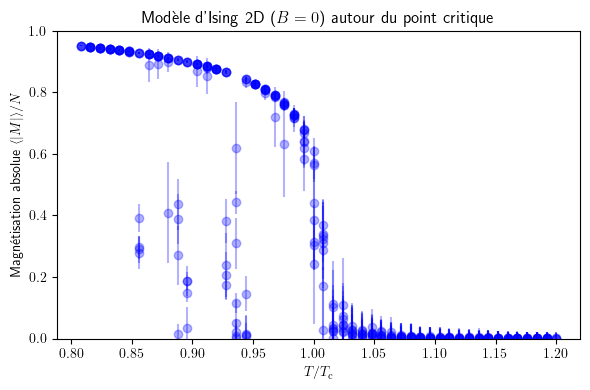

In [27]:
plt.figure(figsize=(6,4))
plt.errorbar(T_sur_Tc, np.abs(M), yerr=varM, linestyle='', marker='o', alpha=0.3, color='blue')
plt.ylim(0,1)
plt.ylabel(r"Magnétisation absolue $\langle |M| \rangle/N$")
plt.xlabel(r"$T/T_\mathrm{c}$")
plt.title("Modèle d'Ising 2D ($B=0$) autour du point critique")
plt.tight_layout()
plt.savefig("ising_stats_scanT_250x250_5e9steps_2runs.magnetisation.pdf", transparent=True)